- Name:Smruti Sonekar
- Branch:CSE DS
- UID:2021700064
- Exp no: 8(To implement Kmeans Algorithm)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*The data is hosted on the Kaggle.*

In [5]:
df1=pd.DataFrame(pd.read_csv("./files/Mall_Customers.csv"))
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



This line of code is initializing a K-means clustering model with specific parameters:

KMeans: This indicates that the model being used is the K-means clustering algorithm.
- n_clusters=3: This parameter specifies the number of clusters (K) that the algorithm should create. In this case, it's set to 3, meaning the algorithm will divide the data into three clusters.
- init='k-means++': This parameter determines the method used for initializing the initial cluster centroids. 'k-means++' is a smart initialization method that selects initial cluster centroids in a way that helps speed up convergence and avoid poor clustering results. It's generally preferred over random initialization, as it often leads to better clustering results.

In [ ]:
df1.shape

(200, 5)

**The problem Statement:**
*The aim of this problem is to segment the customers on the features such as age, spending score , annual income*

- To segment these clients we will use K means Clustering algorithm.
- K-means is an unsupervised machine learning algorithm used for clustering data points into groups or clusters. The goal of K-means is to partition a dataset into K distinct, non-overlapping clusters, where each data point belongs to the cluster with the nearest mean or centroid.
-K-means minimizes the within-cluster sum of squares, which means it tries to make the data points within each cluster as similar to each other as possible.
- The algorithm may converge to a local minimum, depending on the initial placement of centroids. Therefore, it's common to run the algorithm multiple times with different initializations and choose the best result based on some criterion (e.g., minimizing the total within-cluster variance).
- The choice of K (number of clusters) is crucial and often requires domain knowledge or exploration through techniques like the elbow method.
- K-means is sensitive to the scale of features, so it's often necessary to scale or normalize the data before applying the algorithm.

**WORKING OF ALGORITHM:**
- Initialization:
Choose the number of clusters, K.
Randomly initialize K centroids (points in the feature space) as the initial cluster centers.
- Assignment Step:
For each data point, calculate the distance to each centroid.
Assign the data point to the cluster whose centroid is closest (usually using Euclidean distance).
- Update Step:
Recalculate the centroids of the clusters based on the data points assigned to each cluster.
The new centroid is the mean of all data points assigned to that cluster.
- Convergence:
Repeat the assignment and update steps iteratively until convergence criteria are met. Convergence usually occurs when the centroids no longer change significantly or when a maximum number of iterations is reached.
- Result:
After convergence, the K-means algorithm has divided the dataset into K clusters, with each cluster represented by its centroid.
Each data point is assigned to the cluster whose centroid is nearest.

In [ ]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data Visualization

<ipython-input-5-633e1d0868fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df1,palette=palette)


<Axes: xlabel='Gender', ylabel='count'>

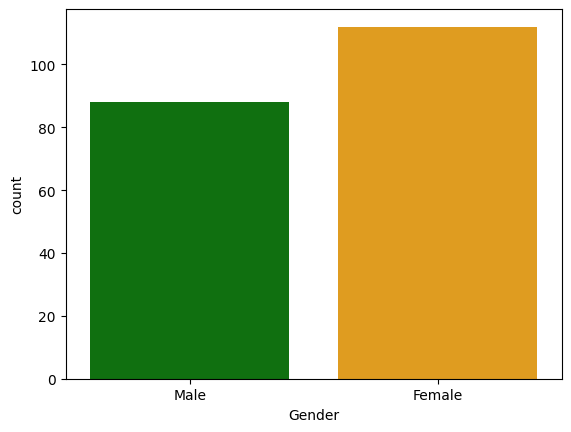

In [ ]:
palette={'Male':'green','Female':'orange'}
sns.countplot(x='Gender',data=df1,palette=palette)

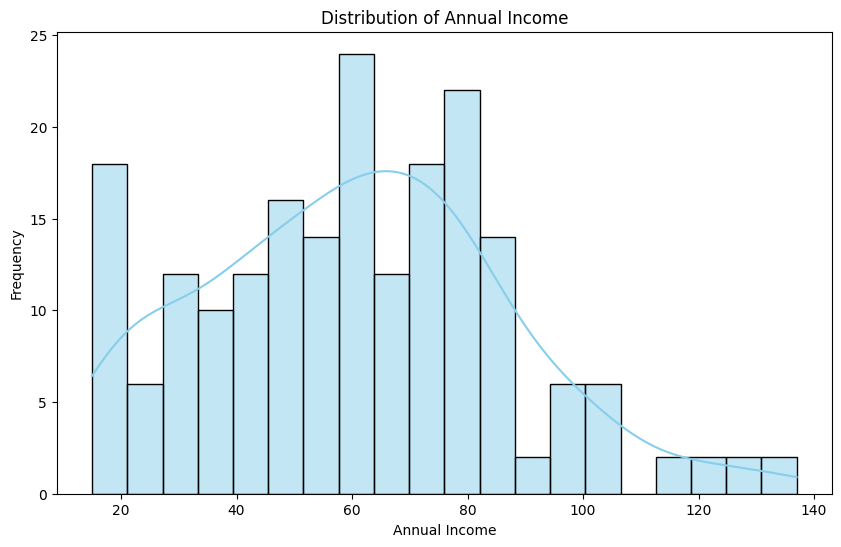

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Annual Income (k$)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

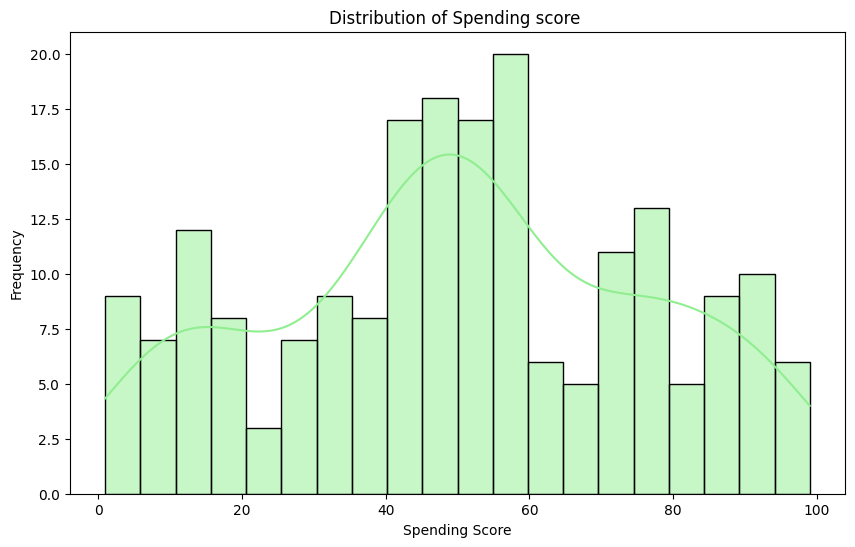

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Spending Score (1-100)'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Spending score ')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

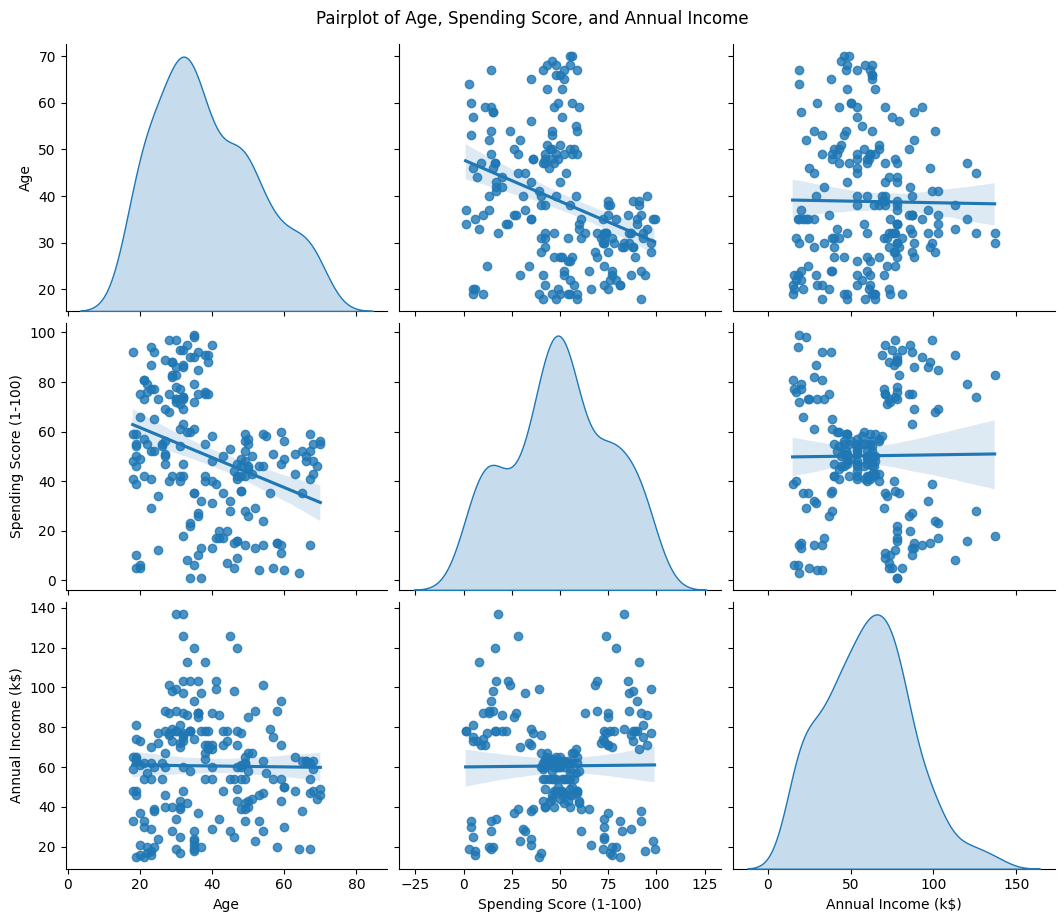

In [ ]:
cols = df1[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

# Create pairplot with x and y labels
g = sns.pairplot(cols, kind="reg", diag_kind="kde", markers="o", height=3, aspect=1.2)

# Add x and y labels to each subplot
for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    g.axes[i, j].set_xlabel(cols.columns[j])
    g.axes[i, j].set_ylabel(cols.columns[i])

# Set title
plt.suptitle("Pairplot of Age, Spending Score, and Annual Income", y=1.02)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
cluster_df = df1[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]


In [ ]:
cluster_df.head(2)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15


In [ ]:
scaler=MinMaxScaler()

data_scaled=scaler.fit_transform(cluster_df)

df2=pd.DataFrame(data_scaled)
df2.columns = ['Age', 'Score', 'Income']



In [ ]:
df2.head(2)

,Age,Score,Income
0,0.019231,0.387755,0.0
1,0.057692,0.816327,0.0


**WCSS AND ELBOW METHOD**
- The number of clusters that we choose for the algorithm shouldn’t be random. Each and every cluster is formed by calculating and comparing the mean distances of each data point within a cluster from its centroid.

- We can choose the right number of clusters with the help of the Within-Cluster-Sum-of-Squares (WCSS) method. WCSS stands for the sum of the squares of distances of the data points in each and every cluster from its centroid.

- The main idea is to minimize the distance (e.g., euclidean distance) between the data points and the centroid of the clusters. The process is iterated until we reach a minimum value for the sum of distances.



Elbow Method
Here are the steps to follow in order to find the optimal number of clusters using the elbow method:

Step 1: Execute the K-means clustering on a given dataset for different K values (ranging from 1-10).

Step 2: For each value of K, calculate the WCSS value.

Step 3: Plot a graph/curve between WCSS values and the respective number of clusters K.

Step 4: The sharp point of bend or a point (looking like an elbow joint) of the plot, like an arm, will be considered as the best/optimal value of K.

**First we will find no of clusters for normal raw data And then find no of clusters for Scaled Data**

##With Given /Raw Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

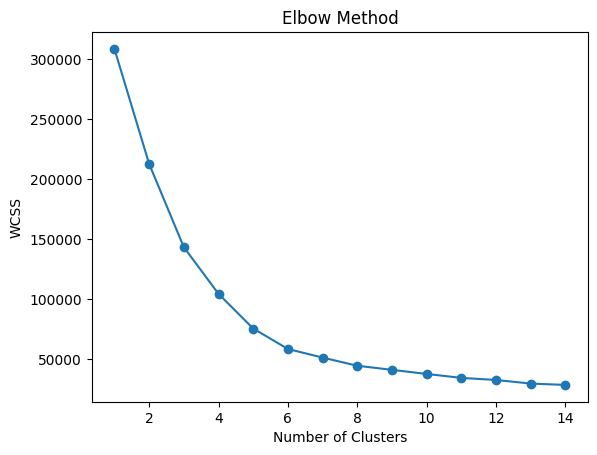

In [ ]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Fit KMeans for a range of cluster values
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cluster_df)
    # Append the WCSS for each cluster value to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 15), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

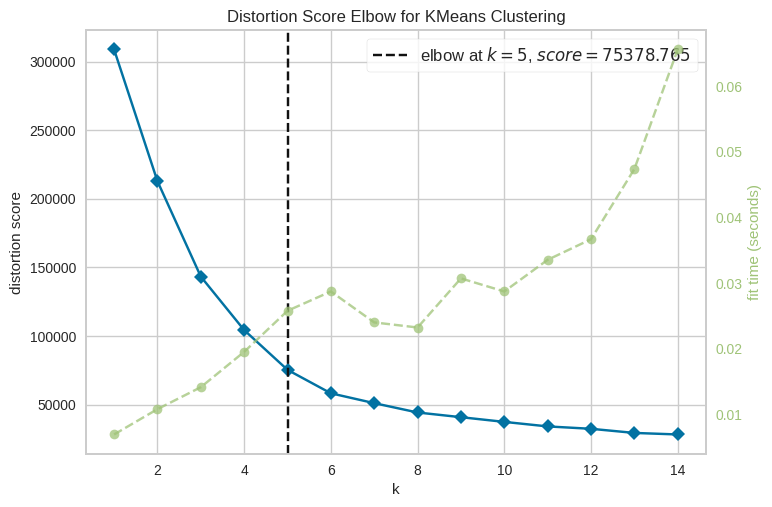

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Assuming 'X' is your feature matrix

# Instantiate the KMeans model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the kmeans model
visualizer = KElbowVisualizer(model, k=(1,15))

# Fit the data and visualize the Elbow method
visualizer.fit(cluster_df)
visualizer.show()

**For raw data no of clusters from Elbow method is =5**

In [ ]:
kmeans1=KMeans(n_clusters=5,init='k-means++')

*In this case, 'k-means++' is used, which is a smart and efficient initialization method that tends to produce better initial centroids compared to random initialization. It helps in speeding up convergence and often leads to better clustering results.*

In [ ]:
kmeans1.fit(cluster_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
kmeans1.inertia_

75350.77917248776

In simpler terms, inertia measures how tightly grouped the data points are within each cluster. If the points in a cluster are close to their centroid, the inertia will be low, indicating a well-defined and compact cluster. Conversely, if the points are scattered far from the centroid, the inertia will be high, suggesting a less cohesive cluster.



In [ ]:
kmeans1.cluster_centers_

array([[45.2173913 , 20.91304348, 26.30434783],
       [32.69230769, 82.12820513, 86.53846154],
       [40.66666667, 17.58333333, 87.75      ],
       [25.52173913, 78.56521739, 26.30434783],
       [43.08860759, 49.56962025, 55.29113924]])

In [ ]:
kmeans1.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
cluster_df['Labels1']=kmeans1.labels_
cluster_df.head()

<ipython-input-21-ad5aab5e913c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Labels1']=kmeans1.labels_


,Age,Spending Score (1-100),Annual Income (k$),Labels1
0,19,39,15,0
1,21,81,15,3
2,20,6,16,0
3,23,77,16,3
4,31,40,17,0


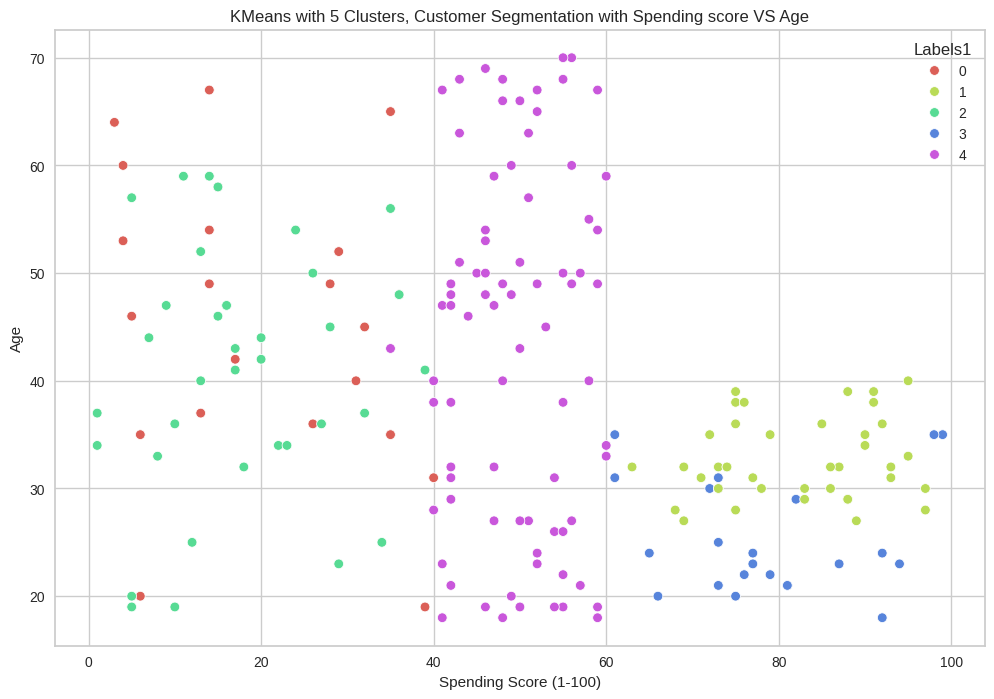

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Spending Score (1-100)', y='Age', hue='Labels1',
                data=cluster_df, palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters, Customer Segmentation with Spending score VS Age')
plt.show()

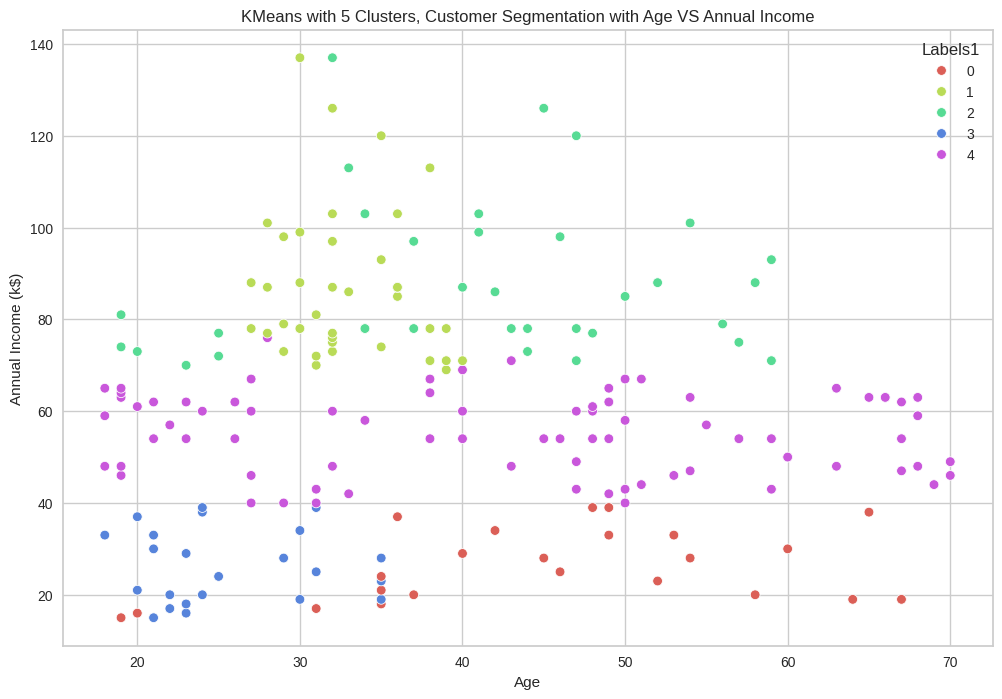

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Labels1',
                data=cluster_df, palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters, Customer Segmentation with Age VS Annual Income')
plt.show()

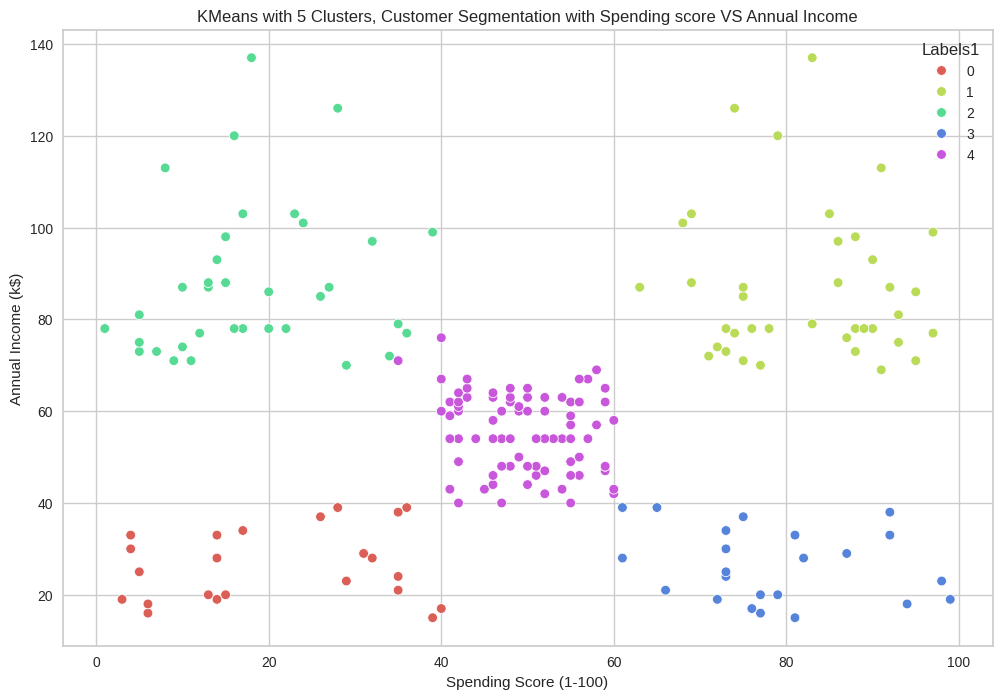

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', hue='Labels1',
                data=cluster_df, palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters, Customer Segmentation with Spending score VS Annual Income')
plt.show()

**This graph between spending score and annual incomes , divides customers into 5 groups**

### Group 0(Red) : Low Spending Score and High Income
### Group 1(Light Green) : High Spending Score and High Income
### Group 2(Sage Green) : High Spending Score and Low Income
### Group 3(Blue) : Low Spending Score and Low Income
### Group 4(Purple) : Medium Spending Score and Medium Income

***Now we will apply Kmeans algorithm on scaled data on df2 , first we will find number of clusters by elbow method and then analyze it***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

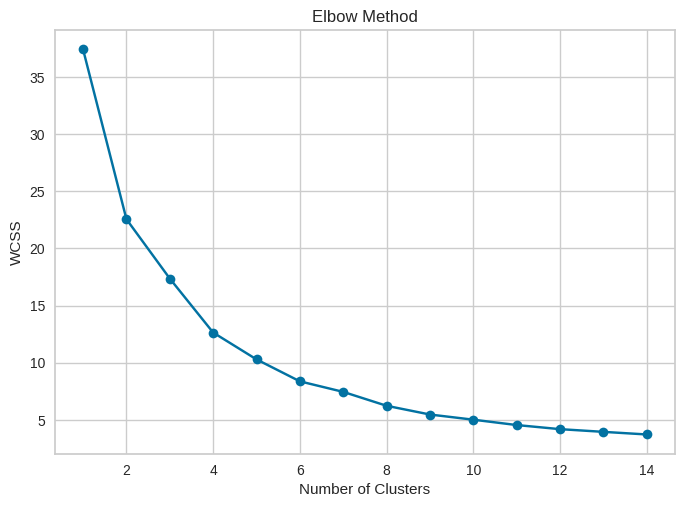

In [ ]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Fit KMeans for a range of cluster values
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df2)
    # Append the WCSS for each cluster value to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 15), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

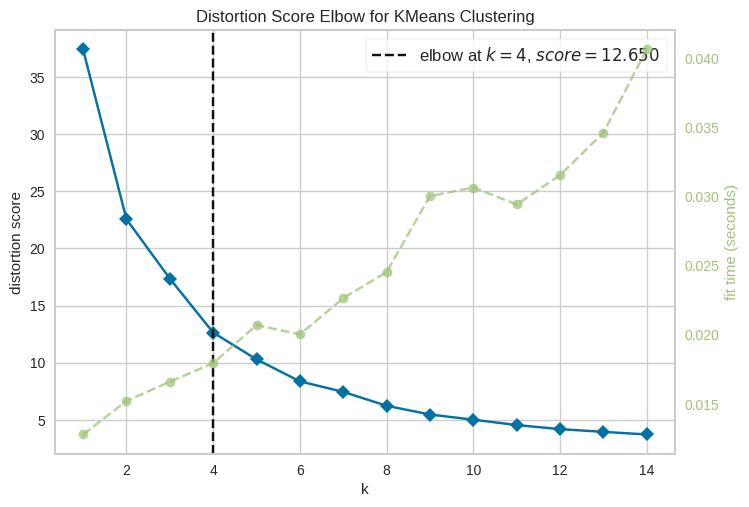

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Assuming 'X' is your feature matrix

# Instantiate the KMeans model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the kmeans model
visualizer = KElbowVisualizer(model, k=(1,15))

# Fit the data and visualize the Elbow method
visualizer.fit(df2)
visualizer.show()

**No of Clusters found for Scaled Data is : 4**

In [ ]:
kmeans2=KMeans(n_clusters=4,init='k-means++')

In [ ]:
kmeans2.fit(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
kmeans2.inertia_

12.650287676229915

**The inertia of a KMeans model is a measure of how tightly clustered the data points are around their centroids. Lower inertia indicates that the data points are closer to their centroids, meaning they are more tightly grouped. In your case, the inertia of kmeans2 is much lower (12.65) compared to the inertia of kmeans1 (75350.78). This suggests that in kmeans2, the data points are much closer to their centroids, indicating tighter clusters and more compact groupings of data.**

**In simpler terms, when the inertia is lower, it means that the clusters formed by the algorithm are more compact and well-defined. So, in the case of kmeans2, where the inertia is significantly lower, the data points are grouped more closely together, indicating more distinct and well-separated clusters.**

In [ ]:
kmeans2.cluster_centers_

array([[0.41093117, 0.1895811 , 0.58606557],
       [0.14304993, 0.60508414, 0.20491803],
       [0.69201183, 0.39764521, 0.26809584],
       [0.28605769, 0.82168367, 0.58278689]])

In [ ]:
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [ ]:
df2['Labels']=kmeans2.labels_

In [ ]:
df2.head(3)

,Age,Score,Income,Labels
0,0.019231,0.387755,0.000000,1
1,0.057692,0.816327,0.000000,1
2,0.038462,0.051020,0.008197,1


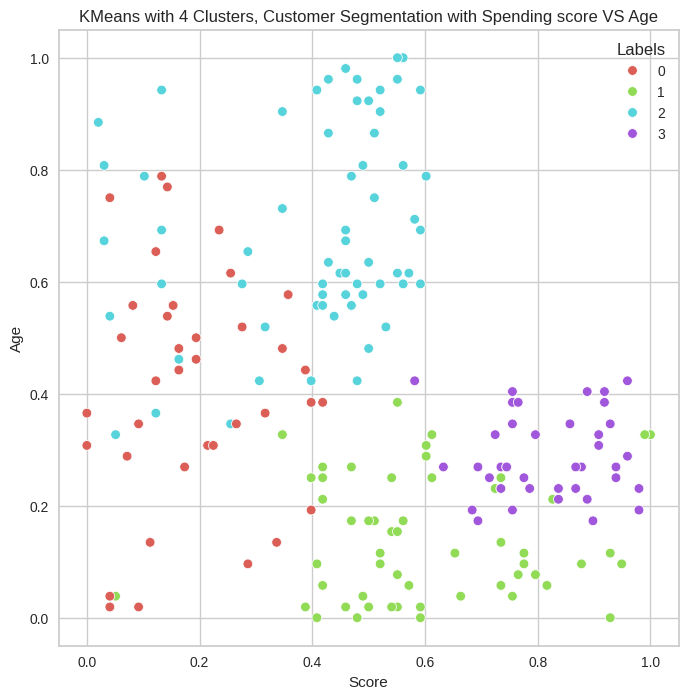

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Score', y='Age', hue='Labels',
                data=df2, palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters, Customer Segmentation with Spending score VS Age')
plt.show()

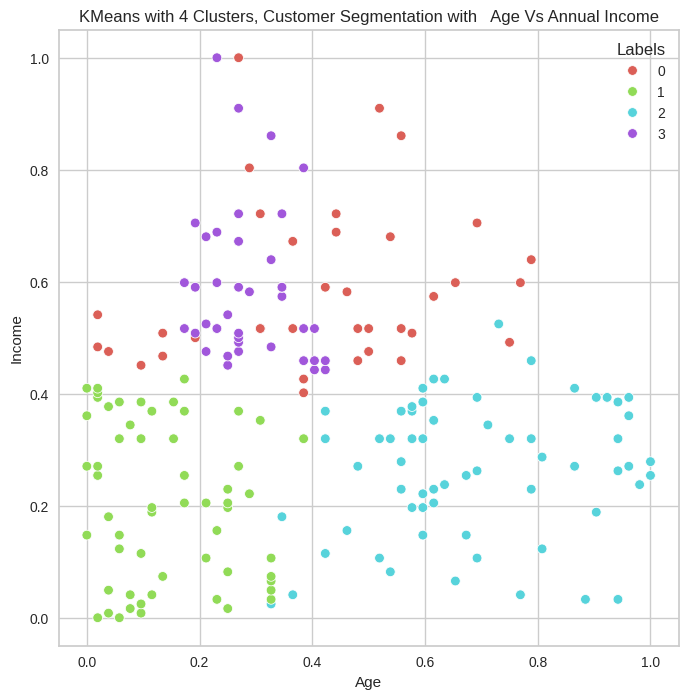

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Age', y='Income', hue='Labels',
                data=df2, palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters, Customer Segmentation with   Age Vs Annual Income')
plt.show()

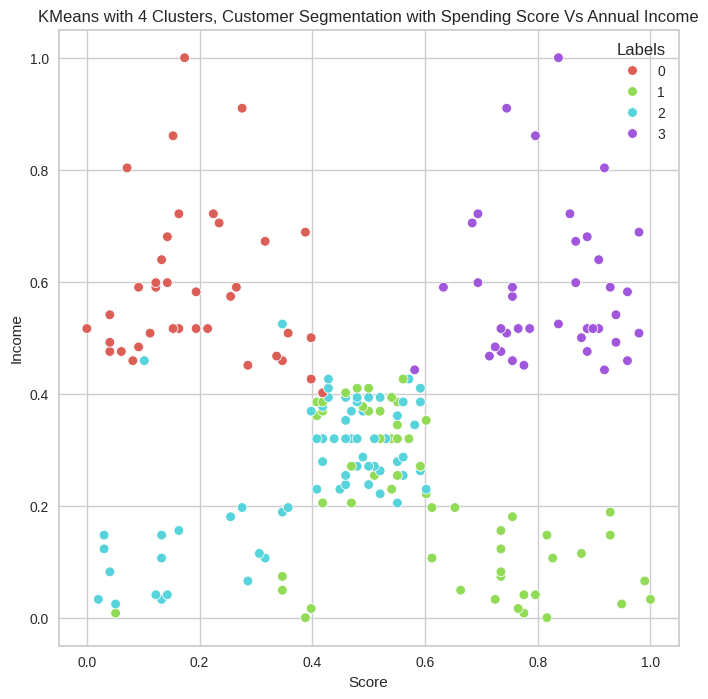

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Score', y='Income', hue='Labels',
                data=df2, palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters, Customer Segmentation with Spending Score Vs Annual Income')
plt.show()

**This graph between spending score and annual incomes , divides customers into 4 groups**

### Group 0(Red) : Low Spending Score and High Income
### Group 1(Green) : High Spending Score and (Low to Medium) Income
### Group 2(Blue) : High Spending Score and High Income
### Group 3(Purple) : Low Spending Score and (Low to Medium) Income


*In both scenarios, applying the KMeans algorithm directly to the raw data effectively segmented the dataset based on annual income and spending score. However, upon scaling the data, a noteworthy observation emerged: there appeared to be some overlapping among clusters, resulting in mixed categories.So got better results with raw dataset*

**Conclusion : This experiment not only introduced the concept of unsupervised KMeans clustering but also highlighted the importance of preprocessing techniques like scaling. Furthermore, the utilization of the elbow method proved instrumental in determining the optimal number of clusters, facilitating a more informed clustering process. Overall, this exercise provided valuable insights into data segmentation techniques and the significance of preprocessing methodologies in clustering analysis.**